<a href="https://colab.research.google.com/github/ihyaulumuddin044/Pengantar_ML/blob/main/modules/logistic_regression/logistic_regression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [ ]:
df = pd.DataFrame({"Jam_Belajar":[0.5,1.0, 1.5, 2.0, 2.5, 3.0],
                   "Hasil":['gagal(0)', 'gagal(0)', 'gagal(0)', 'lulus(1)', 'lulus(1)', 'lulus(1)']})
print(df)

   Jam_Belajar     Hasil
0          0.5  gagal(0)
1          1.0  gagal(0)
2          1.5  gagal(0)
3          2.0  lulus(1)
4          2.5  lulus(1)
5          3.0  lulus(1)


In [ ]:
#  ubah data kategorikal menjadi number
import sklearn.preprocessing as preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Hasil']= label_encoder.fit_transform(df['Hasil'])
df

,Jam_Belajar,Hasil
0,0.5,0
1,1.0,0
2,1.5,0
3,2.0,1
4,2.5,1
5,3.0,1


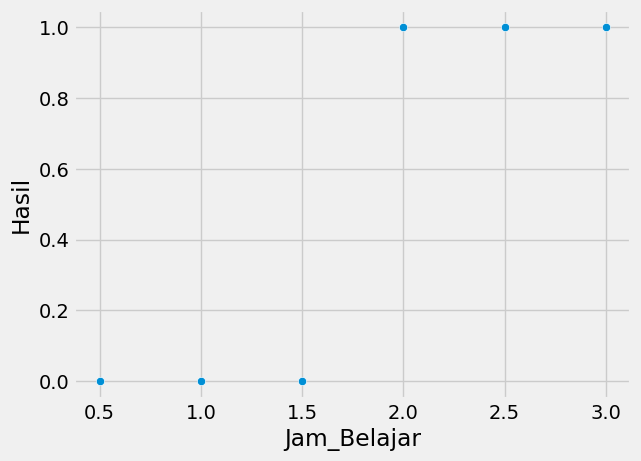

In [ ]:
# visulisasi data
sns.scatterplot(x='Jam_Belajar', y='Hasil', data=df)
plt.show()

In [ ]:
import numpy as np

# --- 1. Persiapan Data ---
# Variabel independen (Jam Belajar)
# Kita tambahkan kolom '1' di awal untuk intercept (beta_0)
# Ini adalah trik umum untuk memasukkan beta_0 ke dalam perhitungan matriks
X = np.array([
    [1, 0.5],
    [1, 1.0],
    [1, 1.5],
    [1, 2.0],
    [1, 2.5],
    [1, 3.0]
])

# Variabel dependen (Lulus/Gagal)
y = np.array([0, 0, 0, 1, 1, 1])

# --- 2. Fungsi Sigmoid ---
# Fungsi ini mengubah nilai Z (logit) menjadi probabilitas antara 0 dan 1
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# --- 3. Fungsi Log-Likelihood (Opsional, untuk monitoring) ---
# Fungsi ini menghitung seberapa "baik" model kita saat ini
def compute_log_likelihood(X, y, beta):
    # Hitung probabilitas yang diprediksi
    predictions = sigmoid(X @ beta) # X @ beta adalah dot product (mirip beta_0 + beta_1*X1)

    # Menghindari log(0) yang akan menghasilkan -inf
    # Kita batasi probabilitas agar tidak persis 0 atau 1
    predictions = np.clip(predictions, 1e-10, 1 - 1e-10)

    # Hitung log-likelihood
    log_likelihood = np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return log_likelihood

# --- 4. Implementasi Gradient Descent ---
# Algoritma ini akan mencari koefisien beta yang optimal
def train_logistic_regression(X, y, learning_rate, n_iterations):
    # Inisialisasi koefisien beta (intercept dan koefisien X1)
    # Kita mulai dengan nilai acak kecil atau nol
    beta = np.zeros(X.shape[1]) # [0, 0] untuk beta_0 dan beta_1

    # Loop iterasi untuk optimasi
    for i in range(n_iterations):
        # a. Hitung prediksi probabilitas (h)
        # Z = X @ beta
        z = X @ beta
        h = sigmoid(z) # Ini adalah P(Y=1|X)

        # b. Hitung error (perbedaan antara y aktual dan h)
        error = h - y

        # c. Hitung gradien (seberapa banyak kita perlu menyesuaikan beta)
        # Gradien adalah turunan dari fungsi log-likelihood
        # Rumus gradien untuk regresi logistik: X.T @ error
        gradient = X.T @ error / len(y) # Dibagi dengan jumlah data (average gradient)

        # d. Perbarui koefisien beta
        beta -= learning_rate * gradient

        # (Opsional) Cetak log-likelihood setiap beberapa iterasi untuk memantau progres
        if i % 1000 == 0: # Cetak setiap 1000 iterasi
            ll = compute_log_likelihood(X, y, beta)
            # print(f"Iterasi {i}, Log-Likelihood: {ll:.4f}, Beta: {beta}")

    return beta

# --- 5. Jalankan Pelatihan ---
learning_rate = 0.1 # Seberapa besar langkah penyesuaian beta setiap iterasi
n_iterations = 100000 # Berapa banyak kali kita akan mengulang penyesuaian

print("Memulai pelatihan model Regresi Logistik...")
optimal_beta = train_logistic_regression(X, y, learning_rate, n_iterations)
print("\nPelatihan selesai.")
print(f"Koefisien optimal (beta_0, beta_1): {optimal_beta}")

# --- 6. Fungsi Prediksi ---
# Setelah model dilatih, kita bisa menggunakannya untuk memprediksi
def predict_proba(X_new, beta):
    z = X_new @ beta
    return sigmoid(z)

def predict_class(X_new, beta, threshold=0.5):
    probabilities = predict_proba(X_new, beta)
    return (probabilities >= threshold).astype(int) # Ubah probabilitas menjadi 0 atau 1

# --- 7. Uji Model ---
print("\n--- Menguji Model ---")

# Prediksi untuk data yang sudah ada
print("\nPrediksi untuk data pelatihan:")
for i in range(len(X)):
    jam_belajar = X[i, 1]
    predicted_prob = predict_proba(X[i], optimal_beta)
    predicted_class = predict_class(X[i], optimal_beta)
    actual_class = y[i]
    print(f"Jam: {jam_belajar:.1f} | Probabilitas Lulus: {predicted_prob:.4f} | Prediksi: {predicted_class} | Aktual: {actual_class}")

# Prediksi untuk siswa baru
print("\nPrediksi untuk siswa baru:")
siswa_baru_jam = 1.8
# Jangan lupa tambahkan '1' di depan untuk intercept
X_siswa_baru = np.array([1, siswa_baru_jam])
prob_siswa_baru = predict_proba(X_siswa_baru, optimal_beta)
class_siswa_baru = predict_class(X_siswa_baru, optimal_beta)
print(f"Siswa belajar {siswa_baru_jam:.1f} jam: Probabilitas Lulus: {prob_siswa_baru:.2f} %, Prediksi: {class_siswa_baru}")

siswa_baru_jam_2 = 1.7
X_siswa_baru_2 = np.array([1, siswa_baru_jam_2])
prob_siswa_baru_2 = predict_proba(X_siswa_baru_2, optimal_beta)
class_siswa_baru_2 = predict_class(X_siswa_baru_2, optimal_beta)
print(f"Siswa belajar {siswa_baru_jam_2:.1f} jam: Probabilitas Lulus: {prob_siswa_baru_2:.2f} %, Prediksi: {class_siswa_baru_2}")

Memulai pelatihan model Regresi Logistik...

Pelatihan selesai.
Koefisien optimal (beta_0, beta_1): [-27.50642542  15.78098601]

--- Menguji Model ---

Prediksi untuk data pelatihan:
Jam: 0.5 | Probabilitas Lulus: 0.0000 | Prediksi: 0 | Aktual: 0
Jam: 1.0 | Probabilitas Lulus: 0.0000 | Prediksi: 0 | Aktual: 0
Jam: 1.5 | Probabilitas Lulus: 0.0211 | Prediksi: 0 | Aktual: 0
Jam: 2.0 | Probabilitas Lulus: 0.9830 | Prediksi: 1 | Aktual: 1
Jam: 2.5 | Probabilitas Lulus: 1.0000 | Prediksi: 1 | Aktual: 1
Jam: 3.0 | Probabilitas Lulus: 1.0000 | Prediksi: 1 | Aktual: 1

Prediksi untuk siswa baru:
Siswa belajar 1.8 jam: Probabilitas Lulus: 0.71 %, Prediksi: 1
Siswa belajar 1.7 jam: Probabilitas Lulus: 0.34 %, Prediksi: 0


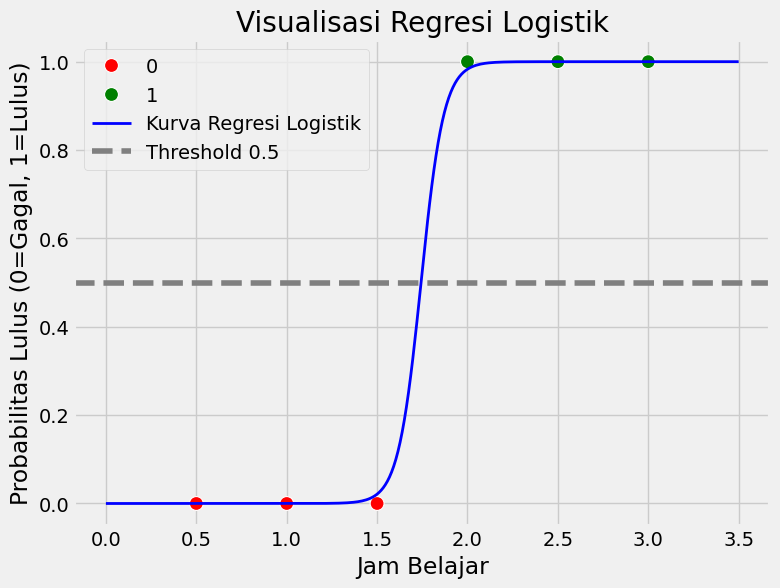

In [ ]:
# --- Visualisasi Kurva Regresi Logistik ---

# Buat rentang nilai Jam_Belajar untuk plotting kurva
# Kita perlu nilai yang lebih halus daripada data aslinya
jam_range = np.linspace(df['Jam_Belajar'].min() - 0.5, df['Jam_Belajar'].max() + 0.5, 300)

# Untuk setiap nilai Jam_Belajar dalam rentang, hitung probabilitas lulus
# Kita perlu menambahkan kolom '1' di depan untuk intercept, seperti saat pelatihan
X_plot = np.vstack([np.ones(len(jam_range)), jam_range]).T

# Hitung probabilitas lulus using the trained model
prob_lulus_plot = predict_proba(X_plot, optimal_beta)

# Create plot
plt.figure(figsize=(8, 6))

# Scatter plot data asli
# Updated palette to use numerical keys 0 and 1
sns.scatterplot(x='Jam_Belajar', y='Hasil', data=df, s=100, hue='Hasil', palette={0:'red', 1:'green'})

# Plot kurva regresi logistik (probabilitas lulus)
plt.plot(jam_range, prob_lulus_plot, color='blue', linewidth=2, label='Kurva Regresi Logistik')

# Add threshold line (e.g., 0.5)
plt.axhline(0.5, color='grey', linestyle='--', label='Threshold 0.5')

# Add labels and title
plt.xlabel('Jam Belajar')
plt.ylabel('Probabilitas Lulus (0=Gagal, 1=Lulus)')
plt.title('Visualisasi Regresi Logistik')
plt.legend()
plt.grid(True)
plt.show()


# implementasi dengan scikit learn

In [ ]:
#  ubah data kategorikal menjadi number
import sklearn.preprocessing as preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Hasil']= label_encoder.fit_transform(df['Hasil'])
display(df)